In [1]:
# standard
import pandas as pd
import numpy as np
import random
import os

# tf and keras
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras import metrics

# plots
import seaborn as sns
import matplotlib.pyplot as plt

import nibabel as nib
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
## Change filepath later with larger dataset
directory = r"C:\Users\there\Downloads\207_project_all-20231120T013601Z-001\207_project_all"

def images_array(directory):
  data_arr = np.zeros((173664,))
  for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    img = nib.load(f)
    data = img.get_fdata()
    data_scaled = data[48:254, 125:197, 82:100]
    data_flatten = data_scaled.flatten()
    data_flatten = data_flatten[:173664]
    data_arr = np.concatenate((data_arr, np.array(data_flatten)), axis=0)
  return data_arr

data_arr = images_array(directory)
print(data_arr.shape)

(347501664,)


In [3]:
def images_id(directory):
    img_id_lst = []
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        split_file_one = filename.split('_I')
        split_file_two = split_file_one[1].split('.nii')
        img_id = split_file_two[0]
        img_id_lst.append(int(img_id))
    return img_id_lst
img_id_lst = images_id(directory)

In [4]:
# Create dataframe of image and diagnosis data
ADNI_file_1 = r"C:\Users\there\Downloads\ADNI_3T_MRI_Standardized_Lists\ADNI_CompleteVisitList_3T_8_28_12.csv"
ADNI_file_2 = r"C:\Users\there\Downloads\ADNI_3T_MRI_Standardized_Lists\ADNI_BaselineList_3T_8_28_12.csv"
ADNI_file_3 = r"C:\Users\there\Downloads\ADNI_3T_MRI_Standardized_Lists\ADNI_Complete1YearVisitList_3T_8_28_12.csv"
ADNI_file_4 = r"C:\Users\there\Downloads\ADNI_3T_MRI_Standardized_Lists\ADNI_Complete2YearVisitList_3T_8_28_12.csv"
ADNI_file_5 = r"C:\Users\there\Downloads\ADNI_3T_MRI_Standardized_Lists\ADNI_CompleteAnnual2YearVisitList_3T_8_28_12.csv"
ADNI_file_6 = r"C:\Users\there\Downloads\ADNI_1.5T_MRI_Standardized_Lists\ADNI_Complete2YearVisitList_8_22_12.csv"
ADNI_file_7 = r"C:\Users\there\Downloads\ADNI_1.5T_MRI_Standardized_Lists\ADNI_CompleteAnnual2YearVisitList_8_22_12.csv"
ADNI_file_8 = r"C:\Users\there\Downloads\ADNI_1.5T_MRI_Standardized_Lists\ADNI_CompleteVisitList_8_22_12.csv"
ADNI_file_9 = r"C:\Users\there\Downloads\ADNI_1.5T_MRI_Standardized_Lists\ADNI_ScreeningList_8_22_12.csv"
ADNI_file_10 = r"C:\Users\there\Downloads\ADNI_1.5T_MRI_Standardized_Lists\ADNI_Complete1YearVisitList_8_22_12.csv"

df_patient_1 = pd.read_csv(ADNI_file_1)
df_patient_2 = pd.read_csv(ADNI_file_2)
df_patient_3 = pd.read_csv(ADNI_file_3)
df_patient_4 = pd.read_csv(ADNI_file_4)
df_patient_5 = pd.read_csv(ADNI_file_5)
df_patient_6 = pd.read_csv(ADNI_file_6)
df_patient_7 = pd.read_csv(ADNI_file_7)
df_patient_8 = pd.read_csv(ADNI_file_8)
df_patient_9 = pd.read_csv(ADNI_file_9)
df_patient_10 = pd.read_csv(ADNI_file_10)
df_patient = pd.concat((df_patient_1, df_patient_2, df_patient_3, df_patient_4, df_patient_5,
                        df_patient_6, df_patient_7, df_patient_8, df_patient_9, df_patient_10))
df_patient


,RID,PTID,Screen.Diagnosis,Visit,Scan.Date,Sequence,Study.ID,Series.ID,Image.ID,Bl.Diagnosis
0,15,100_S_0015,NL,Month 6,5/2/06,MPR-R; ; N3; Scaled,3695,13884,33041,NaN
1,15,100_S_0015,NL,Baseline,10/31/05,MPR-R; ; N3; Scaled,2613,8833,33046,NaN
2,15,100_S_0015,NL,Month 12,10/16/06,MPR-R; ; N3; Scaled,5490,20311,63475,NaN
3,15,100_S_0015,NL,Month 24,10/11/07,MPR; ; N3; Scaled,13281,41463,82551,NaN
4,15,100_S_0015,NL,Month 36,4/27/09,MPR; ; N3; Scaled,21223,66778,160866,NaN
...,...,...,...,...,...,...,...,...,...,...
2289,1426,137_S_1426,MCI,Month 6,4/10/08,MPR-R; GradWarp; N3; Scaled,15458,48599,103514,NaN
2290,1426,137_S_1426,MCI,Month 12,10/30/08,MPR-R; GradWarp; N3; Scaled,18239,58135,125941,NaN
2291,1427,127_S_1427,MCI,Screening,8/20/07,MPR; GradWarp; B1 Correction; N3; Scaled,11182,37933,91126,NaN
2292,1427,127_S_1427,MCI,Month 6,2/19/08,MPR; GradWarp; B1 Correction; N3; Scaled,14728,46021,99191,NaN


In [5]:
# Filter dataframe to have image ID and screening diagnosis only
df_filtered = df_patient.loc[df_patient['Image.ID'].isin(img_id_lst)]
df_filtered = df_filtered[['Image.ID', 'Screen.Diagnosis']]
df_filtered = df_filtered.drop_duplicates(subset=['Image.ID'])
df_final = df_filtered.dropna()
df_final

,Image.ID,Screen.Diagnosis
5,31623,MCI
6,51902,MCI
7,64059,MCI
8,87493,MCI
10,118790,MCI
...,...,...
1937,102067,AD
2054,74748,MCI
2055,106630,MCI
2076,105837,MCI


In [6]:
df_null = df_filtered[df_filtered['Screen.Diagnosis'].isnull()]
diag_lst = ['AD', 'AD', 'MCI', 'AD', 'AD', 'MCI', 'MCI', 'MCI', 'NL',
            'MCI', 'MCI', 'MCI', 'MCI', 'NL', 'NL', 'MCI', 'MCI',
            'NL', 'MCI', 'MCI', 'MCI', 'MCI', 'MCI', 'MCI', 'NL',
            'NL', 'NL', 'MCI', 'NL', 'NL', 'MCI', 'MCI', 'MCI', 
            'MCI', 'AD', 'NL', 'NL', 'MCI', 'MCI', 'MCI', 'NL', 'MCI']

df_null = df_null[['Image.ID']]
df_null['Screen.Diagnosis'] = diag_lst
df_final = pd.concat((df_final, df_null))
df_final = df_final.drop_duplicates(subset=['Image.ID'])

In [7]:
# Change diagnosis to numbers for labels and have list of labels
def num_label(row):
  if row['Screen.Diagnosis'] == 'AD':
    return 2
  elif row['Screen.Diagnosis'] == 'NL':
    return 0
  elif row['Screen.Diagnosis'] == 'MCI':
    return 1
df_final['Diagnosis_label'] = df_final.apply(num_label, axis=1)

df_final = df_final.reset_index()
df_final

,index,Image.ID,Screen.Diagnosis,Diagnosis_label
0,5,31623,MCI,1
1,6,51902,MCI,1
2,7,64059,MCI,1
3,8,87493,MCI,1
4,10,118790,MCI,1
...,...,...,...,...
1995,183,47237,MCI,1
1996,189,87748,MCI,1
1997,192,86345,MCI,1
1998,193,82509,NL,0


In [8]:
data_label = []
for img in img_id_lst:
    row = df_final[df_final['Image.ID'] == img]
    split_one = str(row).split(' ')[-1]
    data_label.append(int(split_one))

In [9]:
# Remove first blank image used to create array
print(data_arr.shape)
data_new = data_arr[173664:]
print(data_new.shape)

(347501664,)
(347328000,)


In [10]:
# Normalize the data in array
data_norm = tf.keras.utils.normalize(data_new)

# Check shape of new array
print(data_norm.shape)

# Check length of diagnosis label matches shape of new array
print(len(data_label))

(1, 347328000)
2000


In [57]:
# Reshape normalized data for 2000 images
data_final = np.reshape(data_norm, (2000, 173664))   

# Check shape of final data array
print(data_final.shape)

(2000, 173664)


## CHANGE PCA VALUE
1. 10x10x10=1000 run time: 5m 55s

In [40]:
# PCA dimensionality reduction and change back to 3D
from sklearn.decomposition import PCA
pca_3D = PCA(n_components=729)   # vary this value later
data_final_pca = pca_3D.fit_transform(data_final)
data_final_pca.shape
data_final_pca

array([[ 8.92769477e-03,  1.46895723e-03, -4.62906541e-03, ...,
        -2.90649594e-05, -7.45831944e-05, -1.62871087e-05],
       [ 8.55893182e-03, -1.48754152e-03,  4.24523898e-03, ...,
         1.47560304e-04,  1.67555777e-05,  3.63992106e-05],
       [ 8.92769477e-03,  1.46895723e-03, -4.62906541e-03, ...,
        -2.90649594e-05, -7.45831944e-05, -1.62871087e-05],
       ...,
       [-5.44522786e-03,  1.14989780e-03,  7.25058777e-04, ...,
        -2.35217285e-04,  3.41557649e-05,  2.71240637e-04],
       [-7.44639531e-03,  3.34626968e-03,  2.46569756e-04, ...,
         1.51499421e-04, -1.67676387e-04, -1.12781154e-04],
       [-2.82184516e-03,  2.85562152e-03,  1.73957787e-03, ...,
         1.37284242e-04,  1.30254909e-05,  2.73794343e-05]])

In [41]:
data_label = np.array(data_label)

In [42]:
# Create function to shuffle and split data into training, validation and testing data (3:1:1)
def shuffle(data_final_pca, data_label):
  split=(0.6,0.2,0.2)
  tf.random.set_seed(0)
  np.random.seed(0)
  shuffle = np.random.permutation(np.arange(data_final_pca.shape[0]))
  data_final_pca, data_label = data_final_pca[shuffle], data_label[shuffle]
  splits = np.multiply(len(data_final_pca), split).astype(int)
  X_train, X_val, X_test = np.split(data_final_pca, [splits[0], splits[0]+splits[1]])
  y_train, y_val, y_test = np.split(data_label, [splits[0], splits[0]+splits[1]])
  return X_train, y_train, X_val, y_val, X_test, y_test

In [63]:
# Split final data array and data label list into train, val and test data
X_train, y_train, X_val, y_val, X_test, y_test = shuffle(data_final, data_label)

# Reshape arrays into 3D
X_train = X_train.reshape(X_train.shape[0], 201, 48, 18).astype('float32')
X_val = X_val.reshape(X_val.shape[0], 201, 48, 18).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 201, 48, 18).astype('float32')

# Print shapes of train, test and val data, verify splits are correct
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_val shape {X_val.shape}")
print(f"y_val shape {y_val.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

X_train shape (1200, 201, 48, 18)
y_train shape (1200,)
X_val shape (400, 201, 48, 18)
y_val shape (400,)
X_test shape (400, 201, 48, 18)
y_test shape (400,)


In [33]:
import numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation

In [64]:
# Create 3D CNN model using 2 layers

model = tf.keras.Sequential()

# add first convolution layer to the model
model.add(tf.keras.layers.Conv3D(
    filters=32,
    kernel_size=(3, 3, 3),
    strides=(2, 2, 2),
    padding='same',
    data_format='channels_last',
    name='conv_1',
    activation='relu'))


# add a max pooling layer with pool size (2,2) and strides of 2
# (this will reduce the spatial dimensions by half)
model.add(tf.keras.layers.MaxPool3D(
    pool_size=(1, 1, 1),
    name='pool_1'))

model.add(Dropout(0.2))
model.add(BatchNormalization())

# add second convolutional layer
model.add(tf.keras.layers.Conv3D(
    filters=64,
    kernel_size=(3, 3, 3),
    strides=(2, 2, 2),
    padding='same',
    name='conv_2',
    activation='relu'))

# add second max pooling layer with pool size (2,2) and strides of 2
# (this will further reduce the spatial dimensions by half)
model.add(tf.keras.layers.MaxPool3D(
    pool_size=(1, 1, 1), 
    name='pool_2'))

model.add(Dropout(0.2))
model.add(BatchNormalization())

# add third convolutional layer
model.add(tf.keras.layers.Conv3D(
    filters=64,
    kernel_size=(3, 3, 3),
    strides=(2, 2, 2),
    padding='same',
    name='conv_3',
    activation='relu'))

# add third max pooling layer with pool size (2,2) and strides of 2
# (this will further reduce the spatial dimensions by half)
model.add(tf.keras.layers.MaxPool3D(
    pool_size=(1, 1, 1),  
    name='pool_3'))

model.add(Dropout(0.2))
model.add(BatchNormalization())

# add fourth convolutional layer
model.add(tf.keras.layers.Conv3D(
    filters=128,
    kernel_size=(3, 3, 3),
    strides=(2, 2, 2),
    padding='same',
    name='conv_4',
    activation='relu'))

# add fourth max pooling layer with pool size (2,2) and strides of 2
# (this will further reduce the spatial dimensions by half)
model.add(tf.keras.layers.MaxPool3D(
    pool_size=(1, 1, 1),  # changed this from 2 to 1
    name='pool_4'))

model.add(Dropout(0.2))
model.add(BatchNormalization())

# add fifth convolutional layer
model.add(tf.keras.layers.Conv3D(
    filters=256,
    kernel_size=(3, 3, 3),
    strides=(2, 2, 2),
    padding='same',
    name='conv_5',
    activation='relu'))

# add fourth max pooling layer with pool size (2,2) and strides of 2
# (this will further reduce the spatial dimensions by half)
model.add(tf.keras.layers.MaxPool3D(
    pool_size=(1, 1, 1),  # changed this from 2 to 1
    name='pool_5'))

model.add(Dropout(0.2))
model.add(BatchNormalization())

# add a fully connected layer (need to flatten the output of the previous layers first)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(
    units=256,
    name='fc_1',
    activation='relu'))

# add dropout layer
model.add(tf.keras.layers.Dropout(
    rate=0.5))

# add the last fully connected layer
# this last layer sets the activation function to "None" in order to output the logits
# note that passing activation = "sigmoid" will return class memembership probabilities but
# in TensorFlow logits are prefered for numerical stability
# set units=1 to get a single output unit (remember it's a binary classification problem)
model.add(tf.keras.layers.Dense(
    units=1,
    name='fc_2',
    activation=None))


# build model and print summary
tf.random.set_seed(1)
model.build(input_shape=(None, 201, 48, 18, 1))  
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv3D)             (None, 101, 24, 9, 32)    896       
                                                                 
 pool_1 (MaxPooling3D)       (None, 101, 24, 9, 32)    0         
                                                                 
 dropout_18 (Dropout)        (None, 101, 24, 9, 32)    0         
                                                                 
 batch_normalization_15 (Ba  (None, 101, 24, 9, 32)    128       
 tchNormalization)                                               
                                                                 
 conv_2 (Conv3D)             (None, 51, 12, 5, 64)     55360     
                                                                 
 pool_2 (MaxPooling3D)       (None, 51, 12, 5, 64)     0         
                                                      

In [65]:
# Optimize model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), 
              metrics=['accuracy'])

In [66]:
# Fit training data into model and check overfitting using validation data
tf.random.set_seed(1234)
np.random.seed(1234)
history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_val, y_val))

Epoch 1/20
38/38 [==============================] - 42s 1s/step - loss: 3.9642 - accuracy: 0.4408 - val_loss: 13.0726 - val_accuracy: 0.3225
Epoch 2/20
38/38 [==============================] - 33s 869ms/step - loss: 2.6054 - accuracy: 0.4667 - val_loss: 13.0726 - val_accuracy: 0.3225
Epoch 3/20
38/38 [==============================] - 38s 1s/step - loss: 2.3469 - accuracy: 0.4775 - val_loss: 13.0726 - val_accuracy: 0.3225
Epoch 4/20
38/38 [==============================] - 55s 1s/step - loss: 2.1009 - accuracy: 0.4775 - val_loss: 13.0726 - val_accuracy: 0.3225
Epoch 5/20
38/38 [==============================] - 49s 1s/step - loss: 2.1095 - accuracy: 0.4783 - val_loss: 13.0726 - val_accuracy: 0.3225
Epoch 6/20
38/38 [==============================] - 45s 1s/step - loss: 2.1336 - accuracy: 0.4775 - val_loss: 13.0726 - val_accuracy: 0.3225
Epoch 7/20
38/38 [==============================] - 51s 1s/step - loss: 2.0855 - accuracy: 0.4792 - val_loss: 13.0726 - val_accuracy: 0.3225
Epoch 8/20

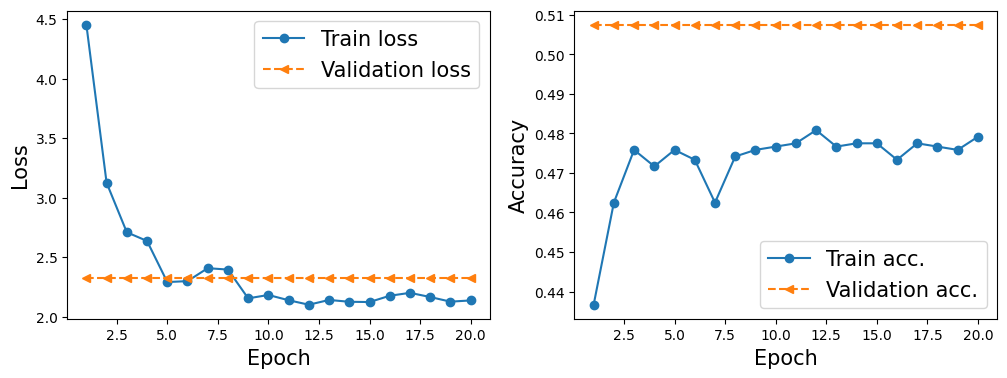

In [ ]:
# Plot validation and training loss
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [ ]:
# Evaluate model using test data
test_results = model.evaluate(X_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

13/13 [==============================] - 1s 69ms/step - loss: 2.2874 - accuracy: 0.4900

Test Acc. 49.00%


In [43]:
# Split final data array and data label list into train, val and test data
X_train, y_train, X_val, y_val, X_test, y_test = shuffle(data_final_pca, data_label)

# Reshape arrays into 3D
X_train = X_train.reshape(X_train.shape[0],9, 9, 9).astype('float32')
X_val = X_val.reshape(X_val.shape[0],9, 9, 9).astype('float32')
X_test = X_test.reshape(X_test.shape[0],9, 9, 9).astype('float32')

# Print shapes of train, test and val data, verify splits are correct
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_val shape {X_val.shape}")
print(f"y_val shape {y_val.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

X_train shape (1200, 9, 9, 9)
y_train shape (1200,)
X_val shape (400, 9, 9, 9)
y_val shape (400,)
X_test shape (400, 9, 9, 9)
y_test shape (400,)


In [44]:
# Create 3D CNN model using 2 layers

model = tf.keras.Sequential()

# add first convolution layer to the model
model.add(tf.keras.layers.Conv3D(
    filters=32,
    kernel_size=(3, 3, 3),
    strides=(2, 2, 2),
    padding='same',
    data_format='channels_last',
    name='conv_1',
    activation='relu'))


# add a max pooling layer with pool size (2,2) and strides of 2
# (this will reduce the spatial dimensions by half)
model.add(tf.keras.layers.MaxPool3D(
    pool_size=(1, 1, 1),
    name='pool_1'))

model.add(Dropout(0.2))
model.add(BatchNormalization())

# add second convolutional layer
model.add(tf.keras.layers.Conv3D(
    filters=64,
    kernel_size=(3, 3, 3),
    strides=(2, 2, 2),
    padding='same',
    name='conv_2',
    activation='relu'))

# add second max pooling layer with pool size (2,2) and strides of 2
# (this will further reduce the spatial dimensions by half)
model.add(tf.keras.layers.MaxPool3D(
    pool_size=(1, 1, 1), 
    name='pool_2'))

model.add(Dropout(0.2))
model.add(BatchNormalization())

# add third convolutional layer
model.add(tf.keras.layers.Conv3D(
    filters=64,
    kernel_size=(3, 3, 3),
    strides=(2, 2, 2),
    padding='same',
    name='conv_3',
    activation='relu'))

# add third max pooling layer with pool size (2,2) and strides of 2
# (this will further reduce the spatial dimensions by half)
model.add(tf.keras.layers.MaxPool3D(
    pool_size=(1, 1, 1),  
    name='pool_3'))

model.add(Dropout(0.2))
model.add(BatchNormalization())

# add fourth convolutional layer
model.add(tf.keras.layers.Conv3D(
    filters=128,
    kernel_size=(3, 3, 3),
    strides=(2, 2, 2),
    padding='same',
    name='conv_4',
    activation='relu'))

# add fourth max pooling layer with pool size (2,2) and strides of 2
# (this will further reduce the spatial dimensions by half)
model.add(tf.keras.layers.MaxPool3D(
    pool_size=(1, 1, 1),  # changed this from 2 to 1
    name='pool_4'))

model.add(Dropout(0.2))
model.add(BatchNormalization())


# add fifth convolutional layer
model.add(tf.keras.layers.Conv3D(
    filters=256,
    kernel_size=(3, 3, 3),
    strides=(2, 2, 2),
    padding='same',
    name='conv_5',
    activation='relu'))

# add fifth max pooling layer with pool size (2,2) and strides of 2
# (this will further reduce the spatial dimensions by half)
model.add(tf.keras.layers.MaxPool3D(
    pool_size=(1, 1, 1),  # changed this from 2 to 1
    name='pool_5'))

# add sixth convolutional layer
model.add(tf.keras.layers.Conv3D(
    filters=256,
    kernel_size=(3, 3, 3),
    strides=(2, 2, 2),
    padding='same',
    name='conv_6',
    activation='relu'))

# add sixth max pooling layer with pool size (2,2) and strides of 2
# (this will further reduce the spatial dimensions by half)
model.add(tf.keras.layers.MaxPool3D(
    pool_size=(1, 1, 1),  # changed this from 2 to 1
    name='pool_6'))

model.add(Dropout(0.2))
model.add(BatchNormalization())

# add a fully connected layer (need to flatten the output of the previous layers first)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(
    units=256,
    name='fc_1',
    activation='relu'))

# add dropout layer
model.add(tf.keras.layers.Dropout(
    rate=0.5))

# add the last fully connected layer
# this last layer sets the activation function to "None" in order to output the logits
# note that passing activation = "sigmoid" will return class memembership probabilities but
# in TensorFlow logits are prefered for numerical stability
# set units=1 to get a single output unit (remember it's a binary classification problem)
model.add(tf.keras.layers.Dense(
    units=1,
    name='fc_2',
    activation=None))


# build model and print summary
tf.random.set_seed(1)
model.build(input_shape=(None,9, 9, 9, 1))  
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv3D)             (None, 5, 5, 5, 32)       896       
                                                                 
 pool_1 (MaxPooling3D)       (None, 5, 5, 5, 32)       0         
                                                                 
 dropout (Dropout)           (None, 5, 5, 5, 32)       0         
                                                                 
 batch_normalization (Batch  (None, 5, 5, 5, 32)       128       
 Normalization)                                                  
                                                                 
 conv_2 (Conv3D)             (None, 3, 3, 3, 64)       55360     
                                                                 
 pool_2 (MaxPooling3D)       (None, 3, 3, 3, 64)       0         
                                                      

In [46]:
# Optimize model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), 
              metrics=['accuracy'])

In [47]:
# Fit training data into model and check overfitting using validation data
tf.random.set_seed(1234)
np.random.seed(1234)
history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_val, y_val))

Epoch 1/20


38/38 [==============================] - 17s 296ms/step - loss: 4.3574 - accuracy: 0.4167 - val_loss: 0.8840 - val_accuracy: 0.3225
Epoch 2/20
38/38 [==============================] - 7s 189ms/step - loss: 2.1558 - accuracy: 0.4717 - val_loss: 0.6189 - val_accuracy: 0.5075
Epoch 3/20
38/38 [==============================] - 7s 191ms/step - loss: 2.0552 - accuracy: 0.4700 - val_loss: 0.5690 - val_accuracy: 0.5075
Epoch 4/20
38/38 [==============================] - 7s 190ms/step - loss: 2.0965 - accuracy: 0.4783 - val_loss: 0.5420 - val_accuracy: 0.5075
Epoch 5/20
38/38 [==============================] - 8s 216ms/step - loss: 2.1043 - accuracy: 0.4617 - val_loss: 0.5495 - val_accuracy: 0.5075
Epoch 6/20
38/38 [==============================] - 7s 189ms/step - loss: 2.0939 - accuracy: 0.4708 - val_loss: 2.3255 - val_accuracy: 0.5075
Epoch 7/20
38/38 [==============================] - 8s 205ms/step - loss: 2.1471 - accuracy: 0.4758 - val_loss: 2.3255 - val_accuracy: 0.5075
Epo

In [48]:
# Evaluate model using test data
test_results = model.evaluate(X_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

13/13 [==============================] - 0s 15ms/step - loss: 2.2874 - accuracy: 0.4900

Test Acc. 49.00%


In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score

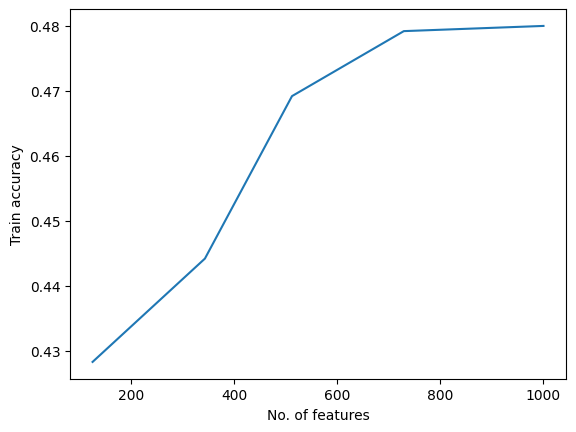

In [50]:
x= [125, 343, 512, 729, 1000]
y = [0.4283, 0.4442, 0.4692, 0.4792, 0.4800]
plt.xlabel('No. of features')
plt.ylabel('Train accuracy')
plt.plot(x, y)

In [52]:
from sklearn.metrics import f1_score
y_pred = model.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.1637593984962406

In [53]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.0